In [1]:
import sys
import os

# Add the parent directory (project root) to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [29]:
from general_python.algebra.utils import get_backend as __backend
from general_python.algebra.ran_wrapper import uniform, randint
# test random
seed    = None
backend = 'np'
for i in range(5):
    modules = __backend(backend, random=True, seed=seed)
    backend, (rnd_module, key) = modules if isinstance(modules, tuple) else (modules, (None, None))
    print(f"backend: {backend}")
    print(f"key: {key}")
    print(f"rnd_module: {rnd_module}")
    print(f"rnd_module.random(): {rnd_module.random()}")
    print(f"rnd_module.randint(0, 10): {rnd_module.integers(0, 10)}")
    print(f"rnd_module.uniform(0, 10): {rnd_module.uniform(0, 10)}")
    print(f"rnd_module.normal(0, 1): {rnd_module.normal(0, 1)}")
    # take the function from random wrapper
    print(f"uniform(0, 10): {uniform(shape=(5,),minval=0, maxval=10, backend=backend, seed=seed)}")
    print()

backend: <module 'numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/numpy/__init__.py'>
key: None
rnd_module: Generator(PCG64)
rnd_module.random(): 0.2875966855732315
rnd_module.randint(0, 10): 6
rnd_module.uniform(0, 10): 1.6305620425215395
rnd_module.normal(0, 1): -1.4886394534245302
uniform(0, 10): [9.066116  7.2955213 4.6222324 4.5788965 7.422896 ]

backend: <module 'numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/numpy/__init__.py'>
key: None
rnd_module: Generator(PCG64)
rnd_module.random(): 0.39785207960770796
rnd_module.randint(0, 10): 6
rnd_module.uniform(0, 10): 4.325006867502479
rnd_module.normal(0, 1): 0.8687436779943527
uniform(0, 10): [5.59749   4.6043787 6.044958  1.4986554 7.389066 ]

backend: <module 'numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/numpy/__init__.py'>
key: None
rnd_module: Generator(PCG64)
rnd_module.random(): 0.1625542951269634
rnd_module.randint(0, 10): 5
rnd_module.uniform

# Models

## Quantum Sun Model

In [1]:
from Algebra.Model.Interacting.Spin.qsm import QSM
backend = 'np'
hamil=QSM(ns=11, hilbert_space=None, n=3, a=0.74, h=1.0, xi=0.2, backend='np', dtype='float64')
hamil.h

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: 2023.12
	Active Backend: jax
	JAX Available: True
	Default Random Key: [    0 12345]
	Active Backend Modules:
		  Main Module: <module 'jax.numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/numpy/__init__.py'>
		  Random Module: <module 'jax.random' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/random.py'>
		  SciPy Module: <module 'jax.scipy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


03_03_2025_17-47_57 [INFO] Log file created: ./log/global.log
03_03_2025_17-47_57 [INFO] Log level set to: info
03_03_2025_17-47_57 [INFO] ########### Global logger initialized. ###########


array([0.72733602, 0.81675834, 1.29736546, 1.17625467, 0.89110955,
       0.83281393, 1.09830875, 0.68673419])

#### Build

##### Sparse

In [23]:
hamil.build(verbose=True, use_numpy=True)
print(f"Memory:{hamil.memory_gb:.3e}gb")

03_03_2025_17-19_59 [INFO] 	->[Quantum Sun Model] Building the Hamiltonian matrix...
03_03_2025_17-19_59 [INFO] 		->[Quantum Sun Model] Initialization completed in 0.000162 seconds
03_03_2025_17-19_59 [INFO] 	->[Quantum Sun Model] Hamiltonian matrix built in 0.043026 seconds.
03_03_2025_17-19_59 [INFO] 	->[Quantum Sun Model] Checking the memory used by the Hamiltonian matrix of type <class 'scipy.sparse._csr.csr_matrix'>
03_03_2025_17-19_59 [INFO] 		->[Quantum Sun Model] It is not a dense matrix...


Memory:3.738e-04gb


In [24]:
hamil.diagonalize(verbose=True)

03_03_2025_17-20_01 [INFO] [Quantum Sun Model] Diagonalization (standard) completed in 0.643752 seconds.


In [25]:
hamil.eig_val

array([-5.01302557, -4.64380034, -4.43862414, ...,  4.59212465,
        4.75617393,  4.91726803])

##### Dense

In [ ]:
qsm.to_dense()

In [ ]:
qsm.build(verbose=True, use_numpy=True)

In [ ]:
qsm.diagonalize(verbose=True)

In [ ]:
qsm.h_memory_gb

##### Plot tests

(array([-5.01302557, -4.64380034, -4.43862414, ...,  4.59212465,
         4.75617393,  4.91726803]),
 array([[-1.90658198e-01,  1.18112881e-01,  5.57936382e-01, ...,
          5.44378278e-10,  3.99596301e-10, -6.62468655e-10],
        [-6.20943946e-03, -1.56066834e-02,  2.21439379e-03, ...,
          3.08589809e-08, -8.71979714e-09, -1.53474086e-08],
        [-9.26630566e-03,  8.46488831e-03,  1.46883618e-02, ...,
          1.93575801e-08, -6.86248372e-09, -3.18247881e-09],
        ...,
        [ 4.34142738e-09,  7.12947584e-09,  3.15918848e-08, ...,
          2.93372741e-02,  3.03895155e-03, -3.60034836e-03],
        [-4.01864018e-09,  6.35652434e-09, -7.34770036e-08, ...,
          2.21385656e-02,  1.23504113e-03,  2.23475968e-03],
        [-4.35092000e-10,  2.49412705e-11, -9.41471260e-10, ...,
          2.68795894e-01, -1.04202537e-01, -3.71620282e-01]]),
 (2048, 2048))

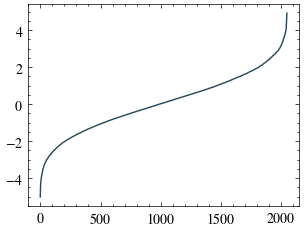

In [28]:
import matplotlib.pyplot as plt
plt.plot(hamil.eig_val)
hamil.eig_val, hamil.eig_vec, hamil.eig_vec.shape

In [29]:
import numpy as np
# make dense
qsm_dense   = qsm.hamil.todense() if qsm.sparse else qsm.hamil
minimum     = qsm_dense.min()
maximum     = qsm_dense.max()
qsm_dense   = np.abs(qsm_dense) / np.abs(qsm_dense).max()

print("Minimum value:", minimum)
print("Maximum value:", maximum)

plt.figure(figsize=(5, 5))
plt.imshow(qsm_dense, cmap='viridis')
plt.colorbar()
plt.title("Density Representation")
plt.show()

NameError: name 'qsm' is not defined

##### Operators

In [2]:
from Algebra.Operator.operators_spin import sig_x, sig_z, OperatorTypeActing
from general_python.common import binary
import numpy as np

backend     = 'np'
ns          = 4
nh          = 2**ns   
sig_x_op = sig_x(ns = ns, type_act = OperatorTypeActing.Global, sites = [ns - 1], backend=backend)
sig_z_op = sig_z(ns = ns, type_act = OperatorTypeActing.Global, sites = [ns - 1], backend=backend)
eye_first   = np.eye(2**(ns - 1))
eye_first

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

###### Check how it works on the base states

###### With states

In [9]:
int_state_full      = 2**(ns) - 1
int_state_half      = 2**(ns - 1) - 1
int_state_half_size = 2**(ns//2) - 1

# binary representation
backend_state           = binary.int2base(int_state_full, size=ns, backend=backend)
backend_state_half      = binary.int2base(int_state_half, size=ns, backend=backend)
backend_state_half_size = binary.int2base(int_state_half_size, size=ns//2, backend=backend)
# string representation
string_state            = binary.int2binstr(int_state_full, bits=ns)
string_state_half       = binary.int2binstr(int_state_half, bits=ns)
string_state_half_size  = binary.int2binstr(int_state_half_size, bits=ns)

# act on the integer states
for state in [int_state_full, int_state_half, int_state_half_size]:
    print()
    # sigma x
    print("Applying sigma_x")
    print(f"Acting on state {state} ({binary.int2binstr(state, bits=ns)})")
    resulting_state, resulting_value = sig_x_op(state)
    print(f"Resulting state: {resulting_state[0]}")
    print(f"Resulting value: {resulting_value}")
    print(f"Binary representation of resulting state: {binary.int2binstr(resulting_state[0], bits=ns)}")
    # sigma z
    print("Applying sigma_z")
    resulting_state, resulting_value = sig_z_op(state)
    print(f"Resulting state: {resulting_state[0]}")
    print(f"Resulting value: {resulting_value}")
    print(f"Binary representation of resulting state: {binary.int2binstr(resulting_state[0], bits=ns)}")
    print()



Applying sigma_x
Acting on state 15 (1111)
Resulting state: 14
Resulting value: [0.5]
Binary representation of resulting state: 1110
Applying sigma_z
Resulting state: 15
Resulting value: [0.5]
Binary representation of resulting state: 1111


Applying sigma_x
Acting on state 7 (0111)
Resulting state: 6
Resulting value: [0.5]
Binary representation of resulting state: 0110
Applying sigma_z
Resulting state: 7
Resulting value: [0.5]
Binary representation of resulting state: 0111


Applying sigma_x
Acting on state 3 (0011)
Resulting state: 2
Resulting value: [0.5]
Binary representation of resulting state: 0010
Applying sigma_z
Resulting state: 3
Resulting value: [0.5]
Binary representation of resulting state: 0011



In [10]:
from Algebra.Operator.operators_spin import _SIG_X, _SIG_Z, _SIG_0

sig_x_op_mat = sig_x_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
sig_x_op_mat_kron = np.kron(eye_first, _SIG_X * 0.5)
sig_z_op_mat = sig_z_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
sig_z_op_mat_kron = np.kron(eye_first, -_SIG_Z * 0.5)

# compare the two
is_equal = np.allclose(sig_x_op_mat.todense(), sig_x_op_mat_kron)
print("Are the two matrices (sig_x) equal?", is_equal)
is_equal = np.allclose(sig_z_op_mat.todense(), sig_z_op_mat_kron)
print("Are the two matrices (sig_z) equal?", is_equal)

if nh < 64:
    from general_python.common.plot import MatrixPrinter
    print("From the operator (sig_x)")
    MatrixPrinter.print_matrix(sig_x_op_mat.todense())
    print("From the operator (sig_z)")
    MatrixPrinter.print_matrix(sig_z_op_mat.todense())
    print("From tensor (sig_x)")
    MatrixPrinter.print_matrix(sig_x_op_mat_kron)
    print("From tensor (sig_z)")
    MatrixPrinter.print_matrix(sig_z_op_mat_kron)

Are the two matrices (sig_x) equal? True
Are the two matrices (sig_z) equal? True
From the operator (sig_x)


Matrix([
[0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0

From the operator (sig_z)


Matrix([
[-0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0],
[

From tensor (sig_x)


Matrix([
[0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0

From tensor (sig_z)


Matrix([
[-0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.5,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0],
[ 0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0,  0.0, 0.0, -0.5, 0.0,  0.0, 0.0,  0.0, 0.0],
[

###### With Hamiltonian

###### Matrix

In [18]:
from general_python.algebra.linalg import act, overlap
from general_python.common.plot import Plotter, colorsCycle
from general_python.maths.statistics import Statistics, HistogramAverage, Fraction
from Algebra.Operator.operators_spin import sig_x, sig_z, OperatorTypeActing
import matplotlib.pyplot as plt
from tqdm import tqdm

dtype           = 'float64'
nrealizations   = (np.array([100, 100, 100, 50, 30, 20])/5).astype(int)
alpha           = 0.86
histograms_x    = {}
histograms_z    = {}
diagonals_x     = {}
diagonals_z     = {}
energies        = {}
nss             = [6,7,8,9]

# nss             = [9,10,11]
# nrealizations   = [10]

def set_histogram(hamiltonian, hist_sig_x: HistogramAverage, hist_sig_z: HistogramAverage, nbins):
    bandwidth       = hamiltonian.get_bandwidth()
    omax            = bandwidth * 3
    omin            = 0.01 / hamiltonian.hilbert_size
    tolerance       = 0.02 * bandwidth
    hist_sig_x.reset(nbins=nbins)
    hist_sig_x.uniform_log(v_max=omax, v_min=omin)
    hist_sig_z.reset(nbins=nbins)
    hist_sig_z.uniform_log(v_max=omax, v_min=omin)
    return tolerance

for ii, ns in enumerate(nss):
    realizations    = nrealizations[ii] if ii < len(nrealizations) else nrealizations[-1]
    energies[ns]    = []
    diagonals_x[ns] = []
    diagonals_z[ns] = []
    nh              = 2**ns
    sites           = [ns - 1]
    # sites           = [0]
    sig_x_op        = sig_x(ns = ns, type_act = OperatorTypeActing.Global, sites = sites, backend=backend)
    sig_z_op        = sig_z(ns = ns, type_act = OperatorTypeActing.Global, sites = sites, backend=backend)
    sig_x_op_mat    = sig_x_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
    sig_z_op_mat    = sig_z_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
    histogram_sig_x = HistogramAverage(dtype=dtype)
    histogram_sig_z = HistogramAverage(dtype=dtype)
    nbins           = int(20 * np.log2(nh))
    tolerance       = 0.0
    for realization in tqdm(range(realizations)):
        # print(f"Realization {realization + 1}/{nrealizations}")
        hamil       = QSM(ns=ns, hilbert_space=None, n=3, a=alpha, h=1.0, xi=0.2, backend = 'np', dtype='float64')
        hamil.build(verbose=False, use_numpy=True)
        hamil.diagonalize(verbose=False)
        states      = hamil.eig_vec
        eigvals     = hamil.eig_val
        sig_x_elems = overlap(states, states, sig_x_op_mat, backend = backend)
        sig_z_elems = overlap(states, states, sig_z_op_mat, backend = backend)
        diag_sig_x  = sig_x_elems.diagonal()
        diag_sig_z  = sig_z_elems.diagonal()
        if realization == 0:
            tolerance = set_histogram(hamil, histogram_sig_x, histogram_sig_z, nbins)
        # get the average energy
        energy_at       = hamil.av_en
        # create the f_functions by taking the middle spectrum (%)
        w, i_idx, j_idx = Fraction.spectral_function_fraction(eigvals, energy_at, tolerance)
        # ones            = np.ones_like(sig_x_elems)
        # ones[i_idx, j_idx] = 0
        # plt.imshow(ones)
        # fill the histogram
        sig_x_changed   = np.abs(sig_x_elems[i_idx, j_idx])**2
        sig_z_changed   = np.abs(sig_z_elems[i_idx, j_idx])**2
        histogram_sig_x.append(w, np.abs(sig_x_elems[i_idx, j_idx])**2)
        histogram_sig_z.append(w, np.abs(sig_z_elems[i_idx, j_idx])**2)
        diagonals_x[ns].append(diag_sig_x)
        diagonals_z[ns].append(diag_sig_z)
        energies[ns].append(eigvals)
    histograms_x[ns] = histogram_sig_x
    histograms_z[ns] = histogram_sig_z
    

100%|██████████| 10/10 [00:01<00:00,  8.79it/s]


ns = 6, gap_ratio = 0.5067111588185733
ns = 7, gap_ratio = 0.5162954355070349
ns = 8, gap_ratio = 0.5153687485021705
ns = 9, gap_ratio = 0.5286536977883811


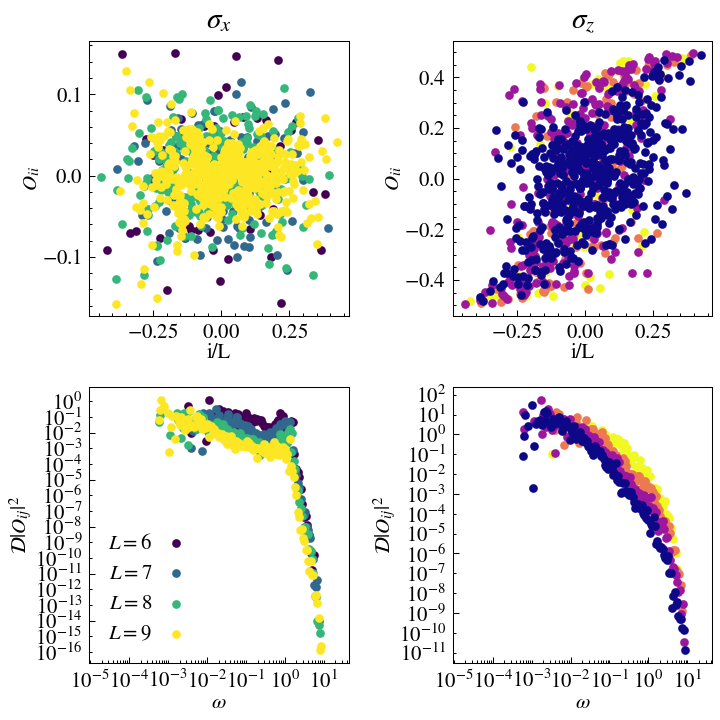

In [19]:
from general_python.physics.eigenlevels import gap_ratio
fig, ax     = Plotter.get_subplots(nrows=2, ncols=2, sizex=5, sizey=5, dpi=150)

# plot
for ii, ns in enumerate(energies.keys()):
    realizations = nrealizations[ii] if ii < len(nrealizations) else nrealizations[-1]
    nh          = 2**ns
    x           = energies[ns][0] / ns
    # x           = np.arange(nh)
    colors1, _, _= Plotter.get_colormap(nss, cmap='viridis')
    colors2, _, _= Plotter.get_colormap(nss, cmap='plasma_r')
    color1      = colors1(ns)
    color2      = colors2(ns)
    Plotter.scatter(ax[0], x, diagonals_x[ns][0], label=f'$L={ns}$', color=color1)
    Plotter.scatter(ax[1], x, diagonals_z[ns][0], label=f'$L={ns}$', color=color2)
    Plotter.set_ax_params(ax[0], xlabel='i/L', ylabel=r'$O_{ii}$', title='$\sigma_x$')
    Plotter.set_ax_params(ax[1], xlabel='i/L', ylabel=r'$O_{ii}$', title='$\sigma_z$')

    Plotter.scatter(ax[2], histograms_x[ns].bin_edges, histograms_x[ns].averages_av()*nh, label=f'$L={ns}$', color=color1)
    Plotter.scatter(ax[3], histograms_z[ns].bin_edges, histograms_z[ns].averages_av()*nh, label=f'$L={ns}$', color=color2)
    Plotter.set_ax_params(ax[2], xlabel=r'$\omega$', 
        ylabel=r'$\mathcal{D}|O_{ij}|^2$', scale={'x': 'log', 'y': 'log'})
    Plotter.set_ax_params(ax[3], xlabel=r'$\omega$', 
        ylabel=r'$\mathcal{D}|O_{ij}|^2$', scale={'x': 'log', 'y': 'log'})
    gap_ratios = [gap_ratio(energies[ns][i])['mean'] for i in range(realizations)]
    print(f"ns = {ns}, gap_ratio = {np.mean(gap_ratios)}")
    Plotter.set_legend(ax[2])
fig.tight_layout()

In [ ]:

d_en = np.diff(energies[8])
d_en = d_en / np.mean(d_en)
gap_ratios = np.minimum(d_en[:-1], d_en[1:]) / np.maximum(d_en[:-1], d_en[1:])
print(np.mean(gap_ratios))


0.42084914016986524


# Linear algebra

In [ ]:
import general_python.algebra as algebra
a = algebra.AlgebraTests(backend='jax')
b = algebra.AlgebraTests(backend='numpy')

## Standard tests

### Change the basis with a unitary matrix

In [ ]:
a.change_basis(verbose=True)
b.change_basis(verbose=True)

### Change the basis of a matrix with a unitary matrix

In [ ]:
a.change_basis_matrix(verbose=True)

### Outer product

In [ ]:
a.outer(verbose=True)
b.outer(verbose=True)

### Kronecker product

In [ ]:
a.kron(verbose=True)

## Linear solvers

In [ ]:
a = algebra.SolversTests(backend='numpy')
b = algebra.SolversTests(backend='jax')

In [ ]:
a.solver_test()

# Binary 

### Standard tests

In [ ]:
from general_python.common import binary
NUM         = 42
tests       = binary.BinaryFunctionTests()

In [ ]:
tests.run_tests(NUM, spin_value = binary._BACKENDREPR)

In [ ]:
tests.run_tests(NUM, spin_value = binary._BACKENDREPR, backend = 'np')

### Test JAX

In [ ]:
from algebra import get_backend
import time 
from jax import numpy as jnp, random as jnpr
import numpy as np, numpy.random as npr
from jax import jit

seed = 1701

# Test the speed of the matrix multiplication
key_np = npr.seed(seed)
key_jnp = jnpr.key(seed)
size = 5000

def matrix_mult_test_jax(size=size):
    random_mat  = jnpr.normal(key_jnp, (size, size))
    vec         = jnpr.normal(key_jnp, (size,))
    result      = random_mat @ vec
    print("Result of matrix-vector multiplication:\n", result)
    
def matrix_mult_test_numpy(size = size):
    random_mat  = npr.normal(size=(size, size))
    vec         = npr.normal(size=(size,))
    result      = random_mat @ vec
    print("Result of matrix-vector multiplication:\n", result)
    
@jit
def matrix_mult_test_jax_jit():
    random_mat  = jnpr.normal(key_jnp, (size, size))
    vec         = jnpr.normal(key_jnp, (size,))
    result      = random_mat @ vec
    print("Result of matrix-vector multiplication:\n", result)


#### Numpy

In [ ]:
start_time = time.time()
matrix_mult_test_numpy()
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds (numpy)")

#### Jax

In [ ]:
start_time = time.time()
matrix_mult_test_jax()
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds (jax)")

#### Jax jit

In [ ]:
start_time = time.time()
matrix_mult_test_jax_jit()
end_time = time.time()  
print(f"Time taken: {end_time - start_time:.4f} seconds (jax, jitted)")

# Lattice


In [ ]:
from lattices import Lattice, run_lattice_tests

# Run tests for different configurations
# run_lattice_tests(dim=1, lx=10, ly=1, lz=1, bc=lattices.LatticeBC.PBC, typek="square")
# run_lattice_tests(dim=2, lx=5, ly=3, lz=1, bc=lattices.LatticeBC.PBC, typek="square")
# run_lattice_tests(dim=2, lx=5, ly=5, lz=1, bc=lattices.LatticeBC.OBC, typek="square")
# run_lattice_tests(dim=3, lx=3, ly=3, lz=3, bc=lattices.LatticeBC.PBC, typek="square")
run_lattice_tests(dim=2, lx=3, ly=2, lz=1, bc=lattices.LatticeBC.PBC, typek="honeycomb")

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

a = 1
b = 1
c = 1

Lx = 4
Ly = 2
Ns = 2 * Lx * Ly

_a1 = np.array([np.sqrt(3) * a / 2.0, 3 * a / 2.0, 0])
_a2 = np.array([np.sqrt(3) * a / 2.0, -3 * a / 2.0, 0])
_a3 = np.array([0, 0, c])



coords      = []
move_vector = _a1 - np.array([0, a, 0])
for i in range(Ns):
    # get the unit cell on a square lattic
    x = (i // 2) % Lx
    y = ((i//2) // Lx) % Ly
    
    # from coorditates to position on the lattice
    xy = np.array([0., 0, 0]) if i % 2 == 0 else move_vector
    xy += x * (_a1 + _a2) + y * _a1
    xp, yp = xy[0], xy[1]
    print(xp, yp)
    plt.scatter(xp, yp, color='red' if i % 2 == 0 else 'blue', marker='o', s=100, facecolor='none')
    plt.text(xp + 0.1, yp + 0.1, i)
    
    print("Ns=", i, "-- (x,y)=", x, y)


plt.arrow(0, 0, _a1[0], _a1[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.arrow(0, 0, _a2[0], _a2[1], head_width=0.1, head_length=0.1, fc='b', ec='b')
# plt.arrow(0, 0, _a1[0] - _a2[0], _a1[1] - _a2[1], head_width=0.1, head_length=0.1, fc='g', ec='g')
# plt.arrow(0, 0, _a1[0] + _a2[0], _a1[1] + _a2[1], head_width=0.1, head_length=0.1, fc='y', ec='y')
# plt.arrow(0, 0, -_a1[0] + _a2[0], -_a1[1] + _a2[1], head_width=0.1, head_length=0.1, fc='m', ec='m')
# plt.arrow(0, 0, -_a1[0] - _a2[0], -_a1[1] - _a2[1], head_width=0.1, head_length=0.1, fc='c', ec='c')


# NQS

## Sampler

In [1]:
import Solver.MonteCarlo.sampler as Sampling
from general_python.algebra.utils import get_backend
from general_python.ml.net_simple import SimpleNet

import random
import numpy as np

# get random backend
backend     = 'jax'
seed        = 1701
be_modules  = get_backend(backend, random=True, seed=seed, scipy=True)
backend_np, (rng, rng_k), backend_sp = be_modules if isinstance(be_modules, tuple) else (be_modules, (None, None), None)

ns                  = 4
st_shape            = (ns, )
activations         = ('relu', 'sigmoid')
net                 = SimpleNet(act_fun =   activations, 
                        input_shape     =   st_shape, 
                        output_shape    =   (1, ),
                        layers          =   (5, ),
                        backend=backend, dtype='complex128',)
            # [random.random() + 1j * random.random() for _ in range(x.shape[0])])
# a simple callable network function

sampler = Sampling.MCSampler(
    net         = net,
    shape       = st_shape,
    rng         = rng,
    rng_k       = rng_k,
    numchains   = 5,
    numsamples  = 5,
    sweep_steps = 8,
    backend     = backend,
    therm_steps = 1,
)

sampler

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


MCSampler(shape=(4,), mu=2.0, beta=1.0, therm_steps=1, sweep_steps=8, numsamples=5, numchains=5, backend=jax)

In [3]:
# check how the sampler performs
(states, logprobas), (configs, configs_ansatze), probabilities = sampler.sample()

In [4]:
# final states after sampling, ansatze after sampling
states, logprobas

(DeviceArray([[ 0.5,  0.5,  0.5,  0.5],
              [ 0.5, -0.5,  0.5,  0.5],
              [-0.5, -0.5,  0.5, -0.5],
              [-0.5,  0.5, -0.5, -0.5],
              [ 0.5, -0.5, -0.5,  0.5]], dtype=float64),
 DeviceArray([[-0.04465321+0.02312861j],
              [ 1.25693115+1.25734512j],
              [-0.05892653+0.28151069j],
              [ 0.33469505+0.03856764j],
              [ 0.49790359+0.01434551j]], dtype=complex128))

In [5]:
# Detailed flow of the configurations

print("Detailed flow of the configurations:")
print("Number of configurations:", len(configs))
print("Number of states:", len(states))
print("Number of probabilities:", len(probabilities))

# Print the configurations, ansatze, and probabilities
for i in range(len(configs)):
    print(f"--- Configuration {i} ---")
    print("Spin Configuration:")
    print(configs[i])
    print("\nAnsatz:")
    print(configs_ansatze[i])
    print("\nProbability:")
    print(probabilities[i])
    print("\n-------------------------\n")

Detailed flow of the configurations:
Number of configurations: 5
Number of states: 5
Number of probabilities: 5
--- Configuration 0 ---
Spin Configuration:
[[-0.5 -0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5  0.5]
 [ 0.5  0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5 -0.5]]

Ansatz:
[[ 0.33861153+0.15002221j]
 [ 0.41089359+0.05104086j]
 [-0.1556691 +0.15240598j]
 [ 0.11743716-0.03818093j]
 [ 0.17293854+0.07735697j]]

Probability:
[1.]

-------------------------

--- Configuration 1 ---
Spin Configuration:
[[ 0.5  0.5 -0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5  0.5  0.5]
 [-0.5  0.5 -0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]]

Ansatz:
[[ 0.11743716-0.03818093j]
 [ 0.56291345+0.5846243j ]
 [-0.1556691 +0.15240598j]
 [ 0.09761571-0.12851962j]
 [ 0.56291345+0.5846243j ]]

Probability:
[1.]

-------------------------

--- Configuration 2 ---
Spin Configuration:
[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]]

Ansatz:
[[-0.04465321+0

In [6]:
# flatten the configurations so that I have an array of samples x original shape
configs.shape
configs_flat = configs.reshape(-1, st_shape[0])
configs_flat.shape
# the same for the ansatze but knowing that each sample has only single ansatz
configs_ansatze_flat = configs_ansatze.reshape(-1)
configs_ansatze_flat.shape

print("Detailed flow of the configurations:")
print("Number of configurations:", len(configs_flat))

# Print the configurations, ansatze, and probabilities
for i in range(len(configs_flat)):
    print(f"--- Configuration {i} ---")
    print("Spin Configuration:")
    print(configs_flat[i])
    print("\nAnsatz:")
    print(configs_ansatze_flat[i])
    # check the ansatz from the network
    ansatz = net(configs_flat[i])
    print("Ansatz from the network:")
    print(ansatz)
    # check whether it's the same
    print("Is the ansatz from the network the same as the one from the sampler?")
    print(np.allclose(ansatz, configs_ansatze_flat[i]))
    print("\n-------------------------\n")


Detailed flow of the configurations:
Number of configurations: 25
--- Configuration 0 ---
Spin Configuration:
[-0.5 -0.5 -0.5 -0.5]

Ansatz:
(0.33861152873176054+0.1500222055275736j)
Ansatz from the network:
[0.33861153+0.15002221j]
Is the ansatz from the network the same as the one from the sampler?
True

-------------------------

--- Configuration 1 ---
Spin Configuration:
[ 0.5 -0.5 -0.5 -0.5]

Ansatz:
(0.41089359143789356+0.05104085664883663j)
Ansatz from the network:
[0.41089359+0.05104086j]
Is the ansatz from the network the same as the one from the sampler?
True

-------------------------

--- Configuration 2 ---
Spin Configuration:
[-0.5 -0.5  0.5  0.5]

Ansatz:
(-0.15566909705231016+0.1524059754337941j)
Ansatz from the network:
[-0.1556691+0.15240598j]
Is the ansatz from the network the same as the one from the sampler?
True

-------------------------

--- Configuration 3 ---
Spin Configuration:
[ 0.5  0.5 -0.5  0.5]

Ansatz:
(0.11743716169291205-0.03818092517761466j)
Ansatz 